## Tarea - Métodos de Aprendizajes de Máquinas en Data Science

### Integrantes: Sofía Álvarez, Sebastián Dinator.

In [2]:
# Importando librerías
import pandas as pd
import numpy as np
from sympy import Matrix
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Graficos
from plotnine import ggplot
from plotnine import *

In [3]:
# Importando la data
df = pd.read_csv('dataTaxi.csv')
df

,Unnamed: 0,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,Horas,DoW,Hora_Inicio,Hora_Fin,distKilometros
0,1,-33.484436,-70.734913,-33.437822,-70.647421,1,sÃ¡bado,01-03-14 01:28,01-03-14 01:59,9.640889
1,3,-33.523092,-70.782872,-33.437234,-70.647150,0,sÃ¡bado,01-03-14 00:04,01-03-14 00:44,15.816194
2,4,-33.455709,-70.631109,-33.437341,-70.647136,0,sÃ¡bado,01-03-14 00:33,01-03-14 00:42,2.529204
3,5,-33.294220,-70.883511,-33.437682,-70.647190,0,sÃ¡bado,01-03-14 00:20,01-03-14 00:56,27.161926
4,6,-33.437601,-70.647152,-33.294479,-70.883178,10,sÃ¡bado,01-03-14 10:16,01-03-14 10:53,27.117458
...,...,...,...,...,...,...,...,...,...,...
452161,630819,-33.410845,-70.587625,-33.403157,-70.794847,23,domingo,31-07-16 23:18,31-07-16 23:44,19.275570
452162,630820,-33.378059,-70.659924,-33.410613,-70.794746,22,domingo,31-07-16 22:43,31-07-16 23:06,13.044041
452163,630821,-33.579867,-70.705105,-33.402888,-70.794640,23,domingo,31-07-16 23:02,31-07-16 23:33,21.382867
452164,630822,-33.396931,-70.792297,-33.433149,-70.624117,22,domingo,31-07-16 22:31,31-07-16 23:02,16.138766


# Problema 1
## Limpieza de Datos

In [4]:
print('Tipos de datos:')
display(df.dtypes)
print('Descripción de los datos:')
display(df.describe())

Tipos de datos:


Unnamed: 0          int64
LatitudPAB        float64
LongitudPAB       float64
LatitudCOM        float64
LongitudCOM       float64
Horas               int64
DoW                object
Hora_Inicio        object
Hora_Fin           object
distKilometros    float64
dtype: object

Descripción de los datos:


,Unnamed: 0,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,Horas,distKilometros
count,452166.000000,452166.000000,452166.000000,452166.000000,452166.000000,452166.000000,452166.000000
mean,315556.037500,-33.436718,-70.655944,-33.442694,-70.660850,11.793052,10.598621
std,181053.682589,0.055233,0.074918,0.060474,0.077424,6.895245,7.393171
min,1.000000,-33.868754,-70.979306,-33.869713,-70.979998,0.000000,0.030007
25%,160921.250000,-33.453083,-70.699870,-33.458440,-70.712886,7.000000,4.548679
50%,317026.000000,-33.433158,-70.646739,-33.436642,-70.650034,12.000000,9.529020
75%,470740.750000,-33.403836,-70.601023,-33.405790,-70.601565,18.000000,16.008261
max,630823.000000,-33.150050,-70.403065,-33.150720,-70.407848,23.000000,65.847860


### Resumen:
* 7 variables numéricas
* 3 variables categóricas

In [5]:
(len(df['Unnamed: 0'].unique()) == len(df))

True

#### La variable 'Unnamed: 0' no aporta información, ya que es un tipo de ID, porque cada punto del data frame tiene un valor distinto. Por lo que será eliminada.

In [6]:
# Revisar la existencia de nulos
print(df.isnull().sum())

Unnamed: 0        0
LatitudPAB        0
LongitudPAB       0
LatitudCOM        0
LongitudCOM       0
Horas             0
DoW               0
Hora_Inicio       0
Hora_Fin          0
distKilometros    0
dtype: int64


#### No existen datos nulos, por lo que, hasta el moemnto, no es necesario descartar ninguna variable (columna) ni dato (fila).

### Debido a que el objetivo es encontrar un patrón común entre los viajes, se asume que se busca entender los movimientos geográficos-espaciales, es por esto, que las variables temporales (Horas, DoW, Hora_Inicio, Hora_Fin) no se consideran significativas. Además, se descarta distKilometros para no agregar una dimensión más que puede producir overfitting, ya que no se relaciona directamente con el espacio.
### Entonces, para mantener un set de datos fácil de graficar e interpretar, que sirve para lograr el objetivo de encontrar patrones en el espacio, en este caso, Santiago, se usarán las siguientes variables: 
* LatitudPAB
* LongitudPAB
* LatitudCOM
* LongitudCOM

#### Ya que representan el origen y destino de los viajes.

In [7]:
data_train = df[['LatitudPAB', 'LongitudPAB','LatitudCOM','LongitudCOM']]
data_train

,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM
0,-33.484436,-70.734913,-33.437822,-70.647421
1,-33.523092,-70.782872,-33.437234,-70.647150
2,-33.455709,-70.631109,-33.437341,-70.647136
3,-33.294220,-70.883511,-33.437682,-70.647190
4,-33.437601,-70.647152,-33.294479,-70.883178
...,...,...,...,...
452161,-33.410845,-70.587625,-33.403157,-70.794847
452162,-33.378059,-70.659924,-33.410613,-70.794746
452163,-33.579867,-70.705105,-33.402888,-70.794640
452164,-33.396931,-70.792297,-33.433149,-70.624117


# Problema 2
## K-Means

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
[8281.395157885048, 6303.875699278862, 4858.028615952798, 4185.605647715302, 3738.2403947799344, 3373.9168660448377, 3070.305525583385, 2821.5414917344765, 2623.271553916871, 2490.567027672218, 2368.1272437043867, 2267.584896836547, 2175.8284232156157, 2092.8895753905163, 2015.3021405816894, 1941.8198130555354, 1870.9526671712779, 1806.564595142444, 1748.5583672351058, 1691.6681722298677, 1637.6840913141377, 1592.1177242235426, 1546.0203546873902, 1499.829186123791, 1462.2707348666806, 1424.786600996018, 1386.4254265694485, 1355.0098550053779, 1328.1218311005316, 1303.136726013294, 1276.192607057599, 1255.3649678435943, 1230.6194895698857, 1210.3925301680401]


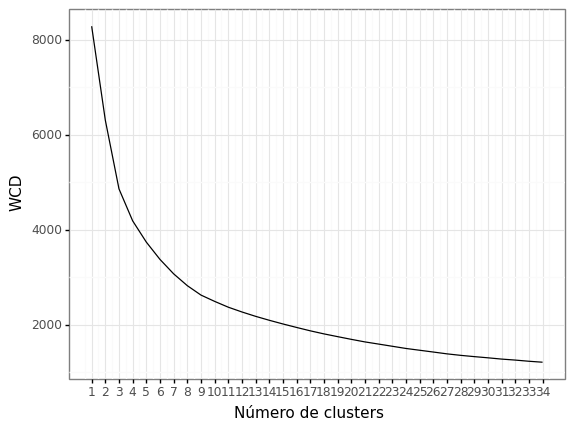

<ggplot: (8769280501318)>

In [6]:
# ¿Cuántos clusters usar?
sse = []
numK = 35
for k in range(1, numK):
    kmeans = KMeans(n_clusters=k,n_init=100)
    kmeans.fit(data) # Antes se llamaba data, después lo cambiamos a data_train pero como se demoró 3 horas, no alcanzamos a correrlo de nuevo.
    print(k)
    sse.append(kmeans.inertia_)

print(sse)
tempDataFrame=pd.DataFrame(range(1, numK),columns=["numK"])
tempDataFrame["sse"]=sse
(ggplot(tempDataFrame)+aes(x="numK",y="sse")+theme_bw()+geom_line()+labs(x="Número de clusters",y="WCD")
  +scale_x_continuous(breaks=range(1,numK)))

#### Considerando el gráfico anterior, la dimensión de los datos y el objetivo, se decide utilizar 9 cluster, justo donde la línea presenta un pequeño codo.

In [8]:
# Creando el modelo
km = KMeans(n_clusters = 9)  
print(km)

# Entrenando el modelo
km=km.fit(data_train)
print(km)

KMeans(n_clusters=9)
KMeans(n_clusters=9)


In [9]:
nombres = np.array([['LatitudPAB', 'LongitudPAB',
                     'LatitudCOM','LongitudCOM']]) # Nombre de las columnas

clusters = np.array([['Cluster'], [0], [1], [2], [3], [4], [5], [6], [7], [8]]) # Nombre de los clusters

A = np.concatenate((nombres, km.cluster_centers_), axis=0) # Concatenando los nombres de las columnas con los centroides
B = np.concatenate((clusters, A), axis=1) # Concatenando los nombres de los clusters con los centroides

print('Centroides')
Matrix(B)    

Centroides


Matrix([
[Cluster,          LatitudPAB,        LongitudPAB,          LatitudCOM,        LongitudCOM],
[      0,  -33.38933707087366,  -70.7505913280721,  -33.39554785025442, -70.74949902600352],
[      1,  -33.43305481338036, -70.60737324607415,   -33.4005251295948, -70.77578049491339],
[      2, -33.544144620421115, -70.60251478649408, -33.458514729779345, -70.63675941347238],
[      3,  -33.43669767864636, -70.64346666785302,  -33.43939446621493, -70.64958998562041],
[      4, -33.437986820937695,  -70.6565982161734, -33.550742293123015, -70.75167554023413],
[      5, -33.536388604854096, -70.74700885519141,  -33.46406697311085, -70.69049051640653],
[      6,  -33.39657551843954,  -70.7765372672524,  -33.43557156731997,  -70.6060126621125],
[      7,  -33.44128456283189, -70.63465145654452,  -33.55285061064288, -70.59624645742527],
[      8, -33.416295500061175,  -70.5930973626933,  -33.41607070584512, -70.58953859236445]])

### Cada centroide tiene 4 dos latitudes y dos longitudes que resumen el inicio y destino de los viajes contenidos en el cluster.

In [88]:
# Para facilitar la elaboración del gráfico se crea un data frame con los centroides
puntos = pd.DataFrame(km.cluster_centers_, columns = ['LatitudPAB', 'LongitudPAB','LatitudCOM','LongitudCOM'])
puntos = puntos[['LongitudPAB', 'LongitudCOM', 'LatitudPAB', 'LatitudCOM']] # Se cambia el orden de las columnas.
puntoss = np.array(puntos) # Y se transforma a array
display(puntoss)

graficar = pd.DataFrame({
    'X0': puntoss[0][0:2],
    'Y0': puntoss[0][2:],
    'X1': puntoss[1][0:2],
    'Y1': puntoss[1][2:],
    'X2': puntoss[2][0:2],
    'Y2': puntoss[2][2:],
    'X3': puntoss[3][0:2],
    'Y3': puntoss[3][2:],
    'X4': puntoss[4][0:2],
    'Y4': puntoss[4][2:],
    'X5': puntoss[5][0:2],
    'Y5': puntoss[5][2:],
    'X6': puntoss[6][0:2],
    'Y6': puntoss[6][2:],
    'X7': puntoss[7][0:2],
    'Y7': puntoss[7][2:],
    'X8': puntoss[8][0:2],
    'Y8': puntoss[8][2:]})

display(graficar)

array([[-70.75059133, -70.74949903, -33.38933707, -33.39554785],
       [-70.60737325, -70.77578049, -33.43305481, -33.40052513],
       [-70.60251479, -70.63675941, -33.54414462, -33.45851473],
       [-70.64346667, -70.64958999, -33.43669768, -33.43939447],
       [-70.65659822, -70.75167554, -33.43798682, -33.55074229],
       [-70.74700886, -70.69049052, -33.5363886 , -33.46406697],
       [-70.77653727, -70.60601266, -33.39657552, -33.43557157],
       [-70.63465146, -70.59624646, -33.44128456, -33.55285061],
       [-70.59309736, -70.58953859, -33.4162955 , -33.41607071]])

,X0,Y0,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8
0,-70.750591,-33.389337,-70.607373,-33.433055,-70.602515,-33.544145,-70.643467,-33.436698,-70.656598,-33.437987,-70.747009,-33.536389,-70.776537,-33.396576,-70.634651,-33.441285,-70.593097,-33.416296
1,-70.749499,-33.395548,-70.775780,-33.400525,-70.636759,-33.458515,-70.649590,-33.439394,-70.751676,-33.550742,-70.690491,-33.464067,-70.606013,-33.435572,-70.596246,-33.552851,-70.589539,-33.416071


### La fila 0 tiene los pares (X = Longitud de inicio, Y = Latitud de inicio) del centroide por cada cluster
### La fila 1 lo mismo pero con el destino.

##### Código usado para automatizar la escritura
for i in range(9):
    print(f"'X{i}': puntoss[{i}][0:2],")
    print(f"'Y{i}': puntoss[{i}][2:],")
    
for i in range(9):
    print(f"+ geom_line(aes(x= 'X{i}', y='Y{i}'), color='{colores[i]}', size=2)")
    
colores = ['pink',
          'gray',
          'green',
          'purple',
          'blue',
          'red',
          'black',
          'orange',
          'brown']
          
count = 0
for i in range(0,18,2):
    print(f"+ geom_point(aes(x= np.array(graficar)[0,{i}], y=np.array(graficar)[0,{i+1}]), color='{colores[count]}', size=3)")
    count += 1 

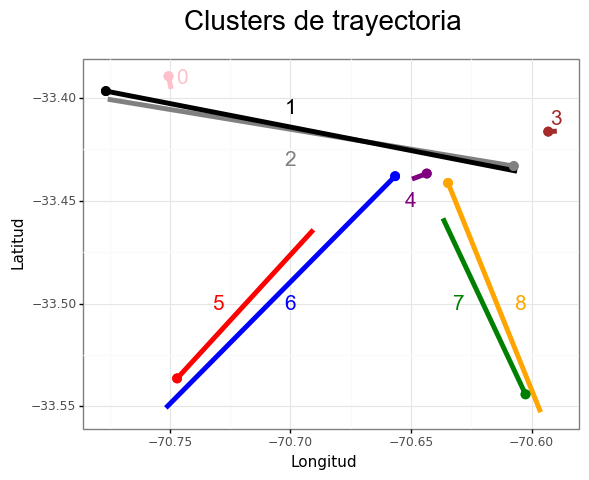

<ggplot: (8792979599607)>

In [46]:
# Gráfico de los clusters
(ggplot(graficar)
+ geom_line(aes(x= 'X0', y='Y0'), color='pink', size=2)
 
+ geom_line(aes(x= 'X1', y='Y1'), color='gray', size=2)
+ geom_line(aes(x= 'X2', y='Y2'), color='green', size=2)
+ geom_line(aes(x= 'X3', y='Y3'), color='purple', size=2)
+ geom_line(aes(x= 'X4', y='Y4'), color='blue', size=2)
+ geom_line(aes(x= 'X5', y='Y5'), color='red', size=2)
+ geom_line(aes(x= 'X6', y='Y6'), color='black', size=2)
+ geom_line(aes(x= 'X7', y='Y7'), color='orange', size=2)
+ geom_line(aes(x= 'X8', y='Y8'), color='brown', size=2)
 

 
+ labs(title = 'Clusters de trayectoria', y = 'Latitud', x = 'Longitud') # Se agregan los títulos

+ theme(axis_title_y=element_text(size=40,color='black',family='Arial')) # Se cambia el tamaño de las letras
+ theme(axis_title_x=element_text(size=40,color='black',family='Arial'))
+ theme(plot_title=element_text(size=20,face="Arial", hjust = 'center', vjust = 'top', color='black',lineheight=2,va="top",family="Arial"))

 
+ theme_bw() # Se cambia el fondo del gráfico
 
# Se grafican los puntos de inicio
+ geom_point(aes(x= np.array(graficar)[0,0], y=np.array(graficar)[0,1]), color='pink', size=3)
+ geom_point(aes(x= np.array(graficar)[0,2], y=np.array(graficar)[0,3]), color='gray', size=3)
+ geom_point(aes(x= np.array(graficar)[0,4], y=np.array(graficar)[0,5]), color='green', size=3)
+ geom_point(aes(x= np.array(graficar)[0,6], y=np.array(graficar)[0,7]), color='purple', size=3)
+ geom_point(aes(x= np.array(graficar)[0,8], y=np.array(graficar)[0,9]), color='blue', size=3)
+ geom_point(aes(x= np.array(graficar)[0,10], y=np.array(graficar)[0,11]), color='red', size=3)
+ geom_point(aes(x= np.array(graficar)[0,12], y=np.array(graficar)[0,13]), color='black', size=3)
+ geom_point(aes(x= np.array(graficar)[0,14], y=np.array(graficar)[0,15]), color='orange', size=3)
+ geom_point(aes(x= np.array(graficar)[0,16], y=np.array(graficar)[0,17]), color='brown', size=3)
 

# Se agregan etiquetas
+ annotate('text',x = -70.70, y = -33.50, label = '6', color = 'blue', size = 15, family = 'arial')
+ annotate('text',x = -70.63, y = -33.50, label = '7', color = 'green', size = 15, family = 'arial')
+ annotate('text',x = -70.70, y = -33.43, label = '2', color = 'gray', size = 15, family = 'arial')
+ annotate('text',x = -70.70, y = -33.405, label = '1', color = 'black', size = 15, family = 'arial')
+ annotate('text',x = -70.605, y = -33.50, label = '8', color = 'orange', size = 15, family = 'arial')
+ annotate('text',x = -70.745, y = -33.39, label = '0', color = 'pink', size = 15, family = 'arial')
+ annotate('text',x = -70.59, y = -33.41, label = '3', color = 'brown', size = 15, family = 'arial')
+ annotate('text',x = -70.65, y = -33.45, label = '4', color = 'purple', size = 15, family = 'arial')
+ annotate('text',x = -70.73, y = -33.50, label = '5', color = 'red', size = 15, family = 'arial')

)

# Problema 3

### Un cluster es un grupo de datos que se caracterizan por compartir caracteristicas similares. En este caso se está buscando un patrón de viaje, por lo que, aquellos puntos pertenecen al mismo cluster son parecidos en términos de lugar de inicio (representado con un circulo del color correspondiente) y destino (el otro extremo se la recta) 

### En el gráfico se muestran 9 rectas porque se encontraron 9 patrones de viaje, es decir, cada línea representa un tipo de viaje, por ejemplo, el color naranja etiquetado con el número 8 indica que existe un grupo de datos (viajes) que parten en el centro y terminan en el sureste de Santiago. 

### Otro ejemplo, es el número 4, este da a entender que hay un alto número de viajes que se da solo en el centro de Santiago.

### Cabe mencionar que el tamaño de la recta demuestra la distancia promedio del viaje. El número no indica orden, es solo una numeración para los clusters. Y, por último, por medio del gráfico no se puede identificar cuántos viajes hay por cluster, sólo se sabe que hay una cantidad suficiente para marcar un patrón.

# Problema 4) 
### Para determinar si un cluster está incorreto se decidió usar el within-cluster-distance, ya que el objetivo de K-mean es minimizar esta métrica. Entonces, la regla es la siguiente: el cluster está mal definido si su WCD es mayor al promedio de todos los WCD.

In [89]:
data_train['labels'] = km.labels_ # Se agrega una columna con los labels
WCD = []
# Se calcula la distancia intra-cluster
for i in range(0,9):
    cluster = data_train[data_train['labels'] == i].copy()
    cluster.drop(columns=['labels'], inplace=True)
    centroide = km.cluster_centers_[i] # Se obtiene el centroide

    distancia_al_centroide = np.linalg.norm(cluster - centroide, axis=1) # Se calcula la distancia al centroide
    distancia_intra_cluster = np.sum(distancia_al_centroide) # Se suman las distancias
    WCD.append(distancia_intra_cluster) # Se agrega a la lista de distancias
    
C = Matrix([round(numero) for numero in WCD])

promedio = round(sum(WCD) / len(WCD)) # Se calcula el promedio de las distancias
print("El promedio es:", promedio)




El promedio es: 3335


<ipython-input-89-5cdeaa76dbf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Revisando qué clusters están mal definidos

In [48]:
# Se crea una lista con los valores de WCD y se compara con el promedio
lista = []
for i in range(9):
    if (WCD[i] >= round(sum(WCD) / len(WCD))):
        lista.append([i,'Incorrecto'])
    else:
        lista.append([i,'Correcto'])

D = np.concatenate((lista, C), axis=1)
Matrix(D)

Matrix([
[0,   Correcto, 2771],
[1, Incorrecto, 4183],
[2,   Correcto, 2144],
[3, Incorrecto, 5341],
[4,   Correcto, 2296],
[5,   Correcto, 2441],
[6, Incorrecto, 3739],
[7,   Correcto, 2196],
[8, Incorrecto, 4902]])

In [49]:
nuevos_C = [] # Lista de centroides
count_k = 0 # Cantidad nueva de clusters
for j in D:
    if 'Incorrecto' in j:
        count_k = count_k + 2
        df_train = data_train[data_train['labels'] == int(j[0])]
        #display(df_train.head(3))
        print(df_train.shape)
        df_train = df_train[['LatitudPAB', 'LongitudPAB','LatitudCOM','LongitudCOM']]
        
        # Se separa el cluster mal definido en 2
        KM = KMeans(n_clusters = 2)  
        KM = KM.fit(df_train)
        print(KM)
        
        # Agregando los nuevos centroides
        nuevos_C.append(list(KM.cluster_centers_[0]))
        nuevos_C.append(list(KM.cluster_centers_[1]))
    
    else:
        # Si ek cluster está correcto se mantiene su centroide
        count_k = count_k + 1
        nuevos_C.append(list(km.cluster_centers_[int(j[0])]))
    

    
print('Centroides nuevos:')
Matrix(np.concatenate((nombres, nuevos_C), axis=0))

(63783, 5)
KMeans(n_clusters=2)
(108089, 5)
KMeans(n_clusters=2)
(56242, 5)
KMeans(n_clusters=2)
(84913, 5)
KMeans(n_clusters=2)
Centroides nuevos:


Matrix([
[         LatitudPAB,        LongitudPAB,          LatitudCOM,        LongitudCOM],
[ -33.38933707087366,  -70.7505913280721,  -33.39554785025442, -70.74949902600352],
[ -33.45759092584665, -70.63829468290436, -33.395934123384585, -70.77432229369073],
[-33.411914236315866, -70.58064919981317, -33.404512930602834, -70.77704007572325],
[-33.544144620421115, -70.60251478649408, -33.458514729779345, -70.63675941347238],
[-33.441484275450954, -70.65891786857027,  -33.43725216611776, -70.64547652465687],
[-33.425642897041556, -70.60784688006248,  -33.44450033421747, -70.65947143321566],
[-33.437986820937695,  -70.6565982161734, -33.550742293123015, -70.75167554023413],
[-33.536388604854096, -70.74700885519141,  -33.46406697311085, -70.69049051640653],
[ -33.39250957223121, -70.77249553130636, -33.462576836955684, -70.63719021089017],
[ -33.40008693694375, -70.77995957686848,  -33.41242247233263,  -70.5792909524693],
[ -33.44128456283189, -70.63465145654452,  -33.55285061064288, -70.

### Se vuelve a correr k-means con el nuevo número de clusters y centroides.

In [50]:
KM_final = KMeans(n_clusters = count_k, init = np.array(nuevos_C), n_init = 1)  # Se crea el modelo con los nuevos centroides

df_final = df[['LatitudPAB', 'LongitudPAB','LatitudCOM','LongitudCOM']] # Se crea el data frame final

KM_final = KM_final.fit(df_final) # Se entrena el modelo
print(KM_final)

df_final['labels'] = KM_final.labels_ # Se agregan las etiquetas al data frame final
df_final

KMeans(init=array([[-33.38933707, -70.75059133, -33.39554785, -70.74949903],
       [-33.45759093, -70.63829468, -33.39593412, -70.77432229],
       [-33.41191424, -70.5806492 , -33.40451293, -70.77704008],
       [-33.54414462, -70.60251479, -33.45851473, -70.63675941],
       [-33.44148428, -70.65891787, -33.43725217, -70.64547652],
       [-33.4256429 , -70.60784688, -33.44450033, -70.65947143],
       [-33.4379...54],
       [-33.5363886 , -70.74700886, -33.46406697, -70.69049052],
       [-33.39250957, -70.77249553, -33.46257684, -70.63719021],
       [-33.40008694, -70.77995958, -33.41242247, -70.57929095],
       [-33.44128456, -70.63465146, -33.55285061, -70.59624646],
       [-33.40637099, -70.5763058 , -33.42373926, -70.60456964],
       [-33.43286757, -70.6213113 , -33.40330461, -70.56442728]]),
       n_clusters=13, n_init=1)


<ipython-input-50-7c5a183f4031>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,labels
0,-33.484436,-70.734913,-33.437822,-70.647421,7
1,-33.523092,-70.782872,-33.437234,-70.647150,7
2,-33.455709,-70.631109,-33.437341,-70.647136,4
3,-33.294220,-70.883511,-33.437682,-70.647190,8
4,-33.437601,-70.647152,-33.294479,-70.883178,1
...,...,...,...,...,...
452161,-33.410845,-70.587625,-33.403157,-70.794847,2
452162,-33.378059,-70.659924,-33.410613,-70.794746,2
452163,-33.579867,-70.705105,-33.402888,-70.794640,1
452164,-33.396931,-70.792297,-33.433149,-70.624117,9


In [51]:
# Se revisa que ninguno de los clusters nuevos supere el promedio anteriormente mencionado
wcd = []
for i in range(count_k): # Cantidad nueva de clusters
    cluster = df_final[df_final['labels'] == i].copy()
    cluster.drop(columns=['labels'], inplace=True)
    centroide = KM_final.cluster_centers_[i]

    distancia_al_centroide = np.linalg.norm(cluster - centroide, axis=1)
    distancia_intra_cluster = np.sum(distancia_al_centroide)
    wcd.append(distancia_intra_cluster)
    
E = Matrix([round(numero) for numero in wcd]) # Se redondean los valores y se transforma a matriz



lista1 = [] # Lista de centroides
for i in range(count_k): # Cantidad nueva de clusters
    if (wcd[i] >= promedio):
        lista1.append([i,'Incorrecto'])
    else:
        lista1.append([i,'Correcto'])

F = np.concatenate((lista1, E), axis=1) # Se concatenan las listas
Matrix(F)

Matrix([
[ 0, Correcto, 2061],
[ 1, Correcto, 2140],
[ 2, Correcto, 1761],
[ 3, Correcto, 1841],
[ 4, Correcto, 2882],
[ 5, Correcto, 2194],
[ 6, Correcto, 1981],
[ 7, Correcto, 2058],
[ 8, Correcto, 2077],
[ 9, Correcto, 1611],
[10, Correcto, 1917],
[11, Correcto, 2297],
[12, Correcto, 2100]])

#### Todos están bien definidos.

##### Código utilizado para automatizar la escritura
for i in range(count_k):
    print(f"'X{i}': datoss[{i}][0:2],")
    print(f"'Y{i}': datoss[{i}][2:],")
    

for i in range(count_k):
    print(f"+ geom_line(aes(x= 'X{i}', y='Y{i}'), color='{colores[i]}', size=2)")
    
for i in range(count_k):
    print(f"+ annotate('text',x = -70.7{i}, y = -33.5{i}, label = '{i}', color = '{colores[i]}', size = 15, family = 'arial')")
    
    
colores = ['#E0361B',
          '#E07E1B',
          '#E0DD1B',
          '#86E01B',
          '#398530',
          '#3BE9C7',  
          '#3BAAE9',
          '#3344F1',
          '#050783',
          '#A638E9',
          '#E938E1',
          '#F136B6',
          '#4B2424']    
    
#3BE9C7
colores = ['#E0361B', '#E07E1B', '#E0DD1B', '#86E01B', '#398530', '#3BE9C7',
'#3BAAE9', '#3344F1', '#050783', '#A638E9', '#E938E1', '#F136B6', '#4B2424']

count = 0
for i in range(0,count_k*2,2):
    print(f"+ geom_point(aes(x= np.array(grafico)[0,{i}], y=np.array(grafico)[0,{i+1}]), color='{colores[count]}', size=3)")
    count += 1 

for i in range(count_k):
    print(f"+ annotate('text',x = -70.7{i}, y = -33.5{i}, label = '{i}', color = '{colores[i]}', size = 15, family = 'arial')")

In [58]:
# Se repite el proceso para graficar
datos = pd.DataFrame(KM_final.cluster_centers_, columns = ['LatitudPAB', 'LongitudPAB','LatitudCOM','LongitudCOM'])
datos = datos[['LongitudPAB', 'LongitudCOM', 'LatitudPAB', 'LatitudCOM']]
datoss = np.array(datos)
#display(datoss)

# Se crea el data frame para graficar
grafico = pd.DataFrame({
    'X0': datoss[0][0:2],
    'Y0': datoss[0][2:],
    'X1': datoss[1][0:2],
    'Y1': datoss[1][2:],
    'X2': datoss[2][0:2],
    'Y2': datoss[2][2:],
    'X3': datoss[3][0:2],
    'Y3': datoss[3][2:],
    'X4': datoss[4][0:2],
    'Y4': datoss[4][2:],
    'X5': datoss[5][0:2],
    'Y5': datoss[5][2:],
    'X6': datoss[6][0:2],
    'Y6': datoss[6][2:],
    'X7': datoss[7][0:2],
    'Y7': datoss[7][2:],
    'X8': datoss[8][0:2],
    'Y8': datoss[8][2:],
    'X9': datoss[9][0:2],
    'Y9': datoss[9][2:],
    'X10': datoss[10][0:2],
    'Y10': datoss[10][2:],
    'X11': datoss[11][0:2],
    'Y11': datoss[11][2:],
    'X12': datoss[12][0:2],
    'Y12': datoss[12][2:]})

display(grafico)

,X0,Y0,X1,Y1,X2,Y2,X3,Y3,X4,Y4,...,X8,Y8,X9,Y9,X10,Y10,X11,Y11,X12,Y12
0,-70.751869,-33.37958,-70.649118,-33.460623,-70.581893,-33.414419,-70.602330,-33.550176,-70.659332,-33.443136,...,-70.771237,-33.394258,-70.781297,-33.398455,-70.634010,-33.442774,-70.581877,-33.408356,-70.645134,-33.444852
1,-70.753191,-33.38345,-70.770468,-33.395102,-70.780357,-33.405511,-70.636872,-33.462402,-70.660008,-33.443475,...,-70.654982,-33.469363,-70.581665,-33.415859,-70.595992,-33.557843,-70.581528,-33.409598,-70.587595,-33.420022


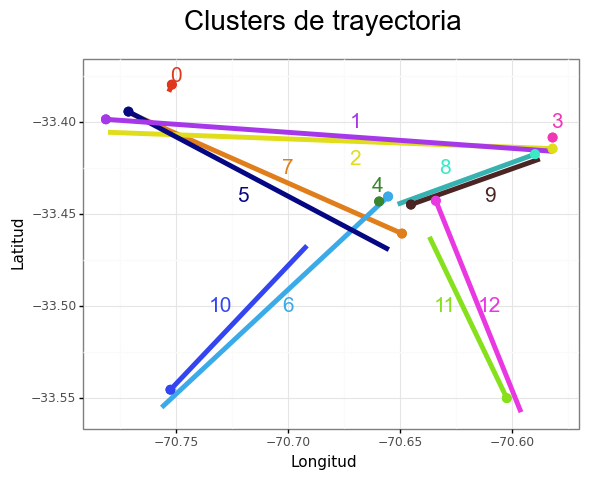

<ggplot: (8792978046651)>

In [93]:
(ggplot(grafico)+ geom_line(aes(x= 'X0', y='Y0'), color='#E0361B', size=2)
+ geom_line(aes(x= 'X1', y='Y1'), color='#E07E1B', size=2)
+ geom_line(aes(x= 'X2', y='Y2'), color='#E0DD1B', size=2)
+ geom_line(aes(x= 'X3', y='Y3'), color='#86E01B', size=2)
+ geom_line(aes(x= 'X4', y='Y4'), color='#398530', size=2)
+ geom_line(aes(x= 'X5', y='Y5'), color='#36B3B1', size=2)
+ geom_line(aes(x= 'X6', y='Y6'), color='#3BAAE9', size=2)
+ geom_line(aes(x= 'X7', y='Y7'), color='#3344F1', size=2)
+ geom_line(aes(x= 'X8', y='Y8'), color='#050783', size=2)
+ geom_line(aes(x= 'X9', y='Y9'), color='#A638E9', size=2)
+ geom_line(aes(x= 'X10', y='Y10'), color='#E938E1', size=2)
+ geom_line(aes(x= 'X11', y='Y11'), color='#F136B6', size=2)
+ geom_line(aes(x= 'X12', y='Y12'), color='#4B2424', size=2)


+ labs(title = 'Clusters de trayectoria', y = 'Latitud', x = 'Longitud')

+ theme(axis_title_y=element_text(size=40,color='black',family='Arial')) 
+ theme(axis_title_x=element_text(size=40,color='black',family='Arial'))
+ theme_bw()  
+ theme(plot_title=element_text(size=20,face="Arial", hjust = 'center', vjust = 'top', color='black',lineheight=2,va="top",family="Arial"))

# Puntos de inicio de cada viaje
+ geom_point(aes(x= np.array(grafico)[0,0], y=np.array(grafico)[0,1]), color='#E0361B', size=3)
+ geom_point(aes(x= np.array(grafico)[0,2], y=np.array(grafico)[0,3]), color='#E07E1B', size=3)
+ geom_point(aes(x= np.array(grafico)[0,4], y=np.array(grafico)[0,5]), color='#E0DD1B', size=3)
+ geom_point(aes(x= np.array(grafico)[0,6], y=np.array(grafico)[0,7]), color='#86E01B', size=3)
+ geom_point(aes(x= np.array(grafico)[0,8], y=np.array(grafico)[0,9]), color='#398530', size=3)
+ geom_point(aes(x= np.array(grafico)[0,10], y=np.array(grafico)[0,11]), color='#3BE9C7', size=3)
+ geom_point(aes(x= np.array(grafico)[0,12], y=np.array(grafico)[0,13]), color='#3BAAE9', size=3)
+ geom_point(aes(x= np.array(grafico)[0,14], y=np.array(grafico)[0,15]), color='#3344F1', size=3)
+ geom_point(aes(x= np.array(grafico)[0,16], y=np.array(grafico)[0,17]), color='#050783', size=3)
+ geom_point(aes(x= np.array(grafico)[0,18], y=np.array(grafico)[0,19]), color='#A638E9', size=3)
+ geom_point(aes(x= np.array(grafico)[0,20], y=np.array(grafico)[0,21]), color='#E938E1', size=3)
+ geom_point(aes(x= np.array(grafico)[0,22], y=np.array(grafico)[0,23]), color='#F136B6', size=3)
+ geom_point(aes(x= np.array(grafico)[0,24], y=np.array(grafico)[0,25]), color='#4B2424', size=3)
 
# Enumeración de los clusters
+ annotate('text',x = -70.61, y = -33.44, label = '9', color = '#4B2424', size = 15, family = 'arial')
+ annotate('text',x = -70.58, y = -33.40, label = '3', color = '#F136B6', size = 15, family = 'arial')
+ annotate('text',x = -70.63, y = -33.425, label = '8', color = '#3BE9C7', size = 15, family = 'arial')
+ annotate('text',x = -70.66, y = -33.435, label = '4', color = '#398530', size = 15, family = 'arial')
+ annotate('text',x = -70.67, y = -33.40, label = '1', color = '#A638E9', size = 15, family = 'arial')
+ annotate('text',x = -70.72, y = -33.44, label = '5', color = '#050783', size = 15, family = 'arial')
+ annotate('text',x = -70.70, y = -33.50, label = '6', color = '#3BAAE9', size = 15, family = 'arial')
+ annotate('text',x = -70.70, y = -33.425, label = '7', color = '#E07E1B', size = 15, family = 'arial')
+ annotate('text',x = -70.67, y = -33.420, label = '2', color = '#E0DD1B', size = 15, family = 'arial')
+ annotate('text',x = -70.75, y = -33.375, label = '0', color = '#E0361B', size = 15, family = 'arial')
+ annotate('text',x = -70.73, y = -33.50, label = '10', color = '#3344F1', size = 15, family = 'arial')
+ annotate('text',x = -70.63, y = -33.50, label = '11', color = '#86E01B', size = 15, family = 'arial')
+ annotate('text',x = -70.61, y = -33.50, label = '12', color = '#E938E1', size = 15, family = 'arial')

)

# Problema 5


Un clúster es un grupo de datos que se caracterizan por compartir características similares. En este caso, se está buscando un patrón de viaje por lo que, aquellos puntos que pertenecen al mismo cluster, son parecidos en términos de lugar de inicio (representado con un círculo del color correspondiente) y destino. 

En el gráfico, se muestran 13 rectas porque se encontraron 13 patrones de viaje, es decir, cada línea representa un tipo de viaje. Por ejemplo, el número 6 inicia en el centro de Santiago y termina en el suroeste.

Cabe mencionar que el tamaño de la recta demuestra la distancia promedio del viaje. El número no indica orden, es solo una numeración para los clusters. Y por último, por medio del gráfico no se puede identificar cuántos viajes hay por cluster, sólo se sabe que hay una cantidad suficiente para marcar un patrón.

# Problema 6
#### Como k-means busca minimizar el within-cluster-distance se seleccionará el método que arroje el menor valor para esta métrica.

In [92]:
# Comparando
print('WCD del problema 2:', km.inertia_)
print('WCD del problema 4:', KM_final.inertia_)


WCD del problema 2: 2623.282027732645
WCD del problema 4: 2205.297935529878


#### Se selecciona el segundo modelo, ya que consigue el menos valor para wcd, dando a entender que los cluster están mejor divididos y definidos.